In [2]:
from rdkit.Chem import DataStructs
from tqdm import tqdm
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from matplotlib import pyplot as plt
import pandas as pd
from moses.metrics import weight, logP, SA, QED,mol_passes_filters
from moses.metrics.utils import get_mol, mapper

from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors,Lipinski,DataStructs
from functools import partial
import numpy as np
from sklearn import manifold
import random
import glob
import os
import seaborn as sns

/home/chensheng/anaconda3/envs/mtdd/lib/python3.8/site-packages/molsets-1.0-py3.8.egg/moses/metrics/utils.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _mcf.append(_pains, sort=True)['smarts'].values]


In [3]:
task='gsk3b_jnk3'
df_dict={}
color_dict={'ReINVENT':'purple','RationaleRL':'green','MARS':'orange','AIxFuse_init':'blue','AIxFuse':'red','rorgt':'black','dhodh':'grey','gsk3b':'black','jnk3':'grey','JMC':'blue'}
for csv in glob.glob(os.path.join('data/compare',task,'*.csv')):
    name=csv.split('/')[-1].split('.')[0]
    if name in color_dict:
        df_dict[name]=(pd.read_csv(csv),name,color_dict[name])
        print(name)
task_dict={'rorgt_dhodh':{'title1':r'ROR$\gamma$t','title2':r'DHODH','pdb_id1':'5NTP','pdb_id2':'6QU7','prec':'XP','device':'gpu','color':['#006400','#B22222']},'gsk3b_jnk3':{'title1':r'GSK3$\beta$','title2':r'JNK3','pdb_id1':'6Y9S','pdb_id2':'4WHZ','prec':'SP','device':'cpu','color':['#87CEEB','#D2691E']}}
target1,target2=task.split('_')
pdb_id1=task_dict[task]['pdb_id1']
pdb_id2=task_dict[task]['pdb_id2']
prec=task_dict[task]['prec']
title1=task_dict[task]['title1']
title2=task_dict[task]['title2']


AIxFuse_init
AIxFuse
MARS
gsk3b
jnk3
RationaleRL
ReINVENT


In [4]:

metric_dict={
    f'{pdb_id1}_{prec}':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1]],
    f'{pdb_id2}_{prec}':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target2]],
    f'SA':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1,target2]],
    f'QED':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1,target2]],
}
for metric in metric_dict:
    fig=plt.figure(figsize=(12,3))
    plt.grid(True,color="gray",linewidth="0.5",axis="both")
    for model,model_name,color in metric_dict[metric]:
        if model_name =='AIxFuse_init':
            model_name = 'AIxFuse(w/o ALRL)'
        if model_name =='gsk3b':
            model_name = r'GSK3$\beta$'+' Inhibitors'
        if model_name =='jnk3':
            model_name = 'JNK3 Inhibitors'
        col=model[metric].dropna()
        sns.distplot(col, hist=False, kde=True,
            kde_kws={'fill': True, 'linewidth': 3},
            label=model_name,color=color)
    plt.ylim(top=plt.ylim()[1])
    title=metric
    if metric == f'{pdb_id1}_{prec}':
        title=r'GSK3$\beta$'+f' Docking Score'
    if metric == f'{pdb_id2}_{prec}':
        title=f'JNK3 Docking Score'
    plt.xlabel(title,fontdict={'family' : 'Times New Roman', 'size'   : 20})
    plt.ylabel('Density',fontdict={'family' : 'Times New Roman', 'size'   : 20})
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.legend(fontsize=16)
    plt.tight_layout()
    fig.savefig(os.path.join('data/outputs/draw/ablation',task,f'{metric}.png'),dpi=250,transparent=True)
    plt.close()

/tmp/ipykernel_1726537/2900580025.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_1726537/2900580025.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_1726537/2900580025.py:18: UserWarni

In [6]:
metric_dict={
    f'{pdb_id1}_{prec}':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target1]],
    f'{pdb_id2}_{prec}':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target2]],
    f'LogP':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target1,target2]],
    f'SA':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target1,target2]],
    f'QED':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target1,target2]],
    f'Weight':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse',target1,target2]],
}
# metric_dict={
#     f'{pdb_id1}_{prec}':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1]],
#     f'{pdb_id2}_{prec}':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target2]],
#     # f'LogP':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse_init','AIxFuse',target1,target2]],
#     f'SA':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1,target2]],
#     f'QED':[df_dict[name] for name in ['AIxFuse_init','AIxFuse',target1,target2]],
#     # f'Weight':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse_init','AIxFuse',target1,target2]],
# }
metric_14d={'QED':0.368308769245971,'SA':3.74619658218488,'5NTP_XP':-12.9913537202175,'6QU7_XP':-10.1629030495152,'LogP':6.71892,'Weight':585.998}
for metric in metric_dict:
    fig=plt.figure(figsize=(9,3))
    plt.grid(True,color="gray",linewidth="0.5",axis="both")
    for model,model_name,color in metric_dict[metric]:
        if model_name =='AIxFuse_init':
            model_name = 'AIxFuse(w/o ALRL)'
        if model_name ==target1:
            model_name = title1+' Inhibitors'
        if model_name ==target2:
            model_name = title2+ ' Inhibitors'
        col=model[metric].dropna()
        # col[col.isnull()]=0
        sns.distplot(col, hist=False, kde=True,
            kde_kws={'fill': True, 'linewidth': 3},
            label=model_name,color=color)
    plt.ylim(top=plt.ylim()[1])
    if task=='rorgt_dhodh':
        plt.plot([metric_14d[metric],metric_14d[metric]],[0,plt.ylim()[1]],label='JMC (R)-14d')
    title=metric
    if metric == f'{pdb_id1}_{prec}':
        title=title1+f' Docking Score'
    if metric == f'{pdb_id2}_{prec}':
        title=title2+f' Docking Score'
    plt.xlabel(title,fontdict={'family' : 'Times New Roman', 'size'   : 20})
    plt.ylabel('Density',fontdict={'family' : 'Times New Roman', 'size'   : 20})
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    if metric=='QED':
        plt.legend(loc='upper left',fontsize=14)
    else:
        plt.legend(fontsize=14)
    plt.tight_layout()
    # plt.xlim(left=0)
    # plt.ylim(bottom=plt.ylim()[0]+plt.ylim()[1]/100)
    fig.savefig(os.path.join('data/outputs/images/distribution',task,f'{metric}.png'),dpi=250,transparent=True)
    plt.close()

/tmp/ipykernel_1738811/49107486.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_1738811/49107486.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_1738811/49107486.py:30: UserWarning: 



In [4]:
width =0.5
colors=['purple','green','orange','#B22222','red']

data=[19.75, 38.47, 11.90, 45.50, 81.74]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Unique Success Rate (%) of " +title1+' Docking Score',fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate',task,f'{target1}_docking.png'),dpi=250,transparent=True)
plt.clf()

data=[16.73, 23.94, 6.63, 42.22, 78.20]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Unique Success Rate (%) of " +title2+' Docking Score',fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate',task,f'{target2}_docking.png'),dpi=250,transparent=True)
plt.clf()

data=[14.77, 46.84, 24.05, 13.16, 37.64]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Unique Success Rate (%) of QED",fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate',task,f'QED.png'),dpi=250,transparent=True)
plt.clf()

data=[55.45, 16.39, 17.02, 26.03, 55.66]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Unique Success Rate (%) of SA",fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate',task,f'SA.png'),dpi=250,transparent=True)
plt.clf()



<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

(-74.65, -31.69)


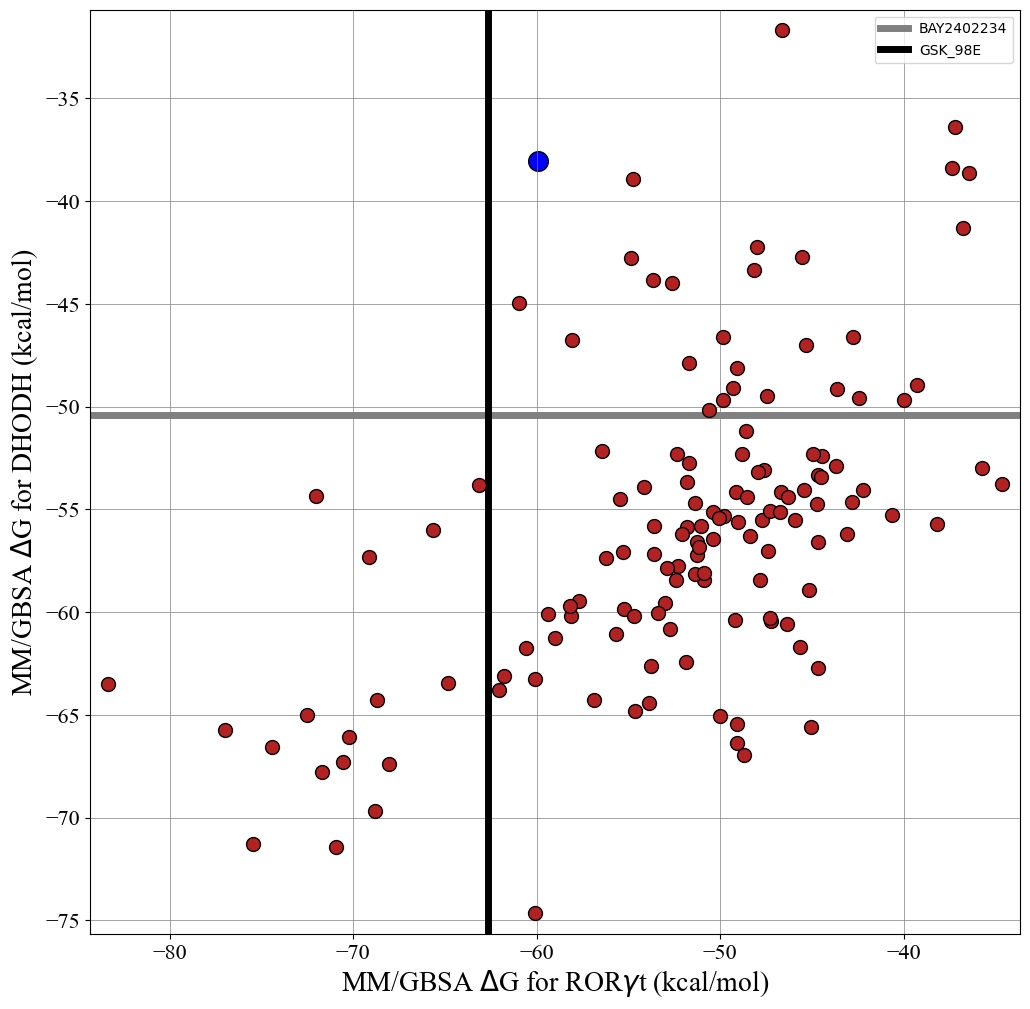

In [5]:
mmgbsa_df=pd.read_csv('data/outputs/mmbgsa/mmgbsa_compare.csv')
score1s=[]
score2s=[]
for title,score1,score2 in zip(mmgbsa_df['Title'],mmgbsa_df['mmgbsa_rorgt'],mmgbsa_df['mmgbsa_dhodh']):
    if title =='(R)-14d':
        ref_dualx=score1
        ref_dualy=score2
        continue
    if title =='GSK_98E':
        ref_rorx=score1
        continue
    if title =='BAY2402234':
        ref_dhoy=score2
        continue
    score1s.append(score1)
    score2s.append(score2)
print((score2s[np.array(score2s).argsort()[0]],score2s[np.array(score2s).argsort()[-2]]))
fig=plt.figure(figsize=(12,12))
plt.ylim((score2s[np.array(score2s).argsort()[0]]-1,score2s[np.array(score2s).argsort()[-2]]+1))
plt.grid(True,color="gray",linewidth="0.5",axis="both")
plt.plot([plt.xlim()[0]-100,plt.xlim()[1]+100],[ref_dhoy,ref_dhoy],label='BAY2402234',color='grey',linewidth=5)
plt.plot([ref_rorx,ref_rorx],[plt.ylim()[0]-100,plt.ylim()[1]+100],label='GSK_98E',color='black',linewidth=5)
plt.scatter(score1s,score2s,color='#B22222',s=100,edgecolors='black',label='AIxFuse generated',zorder=100)
plt.scatter(ref_dualx,ref_dualy,color='blue',s=200,label='(R)-14d',edgecolors='black')
plt.xlim((score1s[np.array(score1s).argsort()[0]]-1,score1s[np.array(score1s).argsort()[-1]]+1))
plt.xlabel('MM/GBSA '+r'$\Delta$'+'G for ROR'+r'$\gamma$'+'t (kcal/mol)',fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.ylabel('MM/GBSA '+r'$\Delta$'+'G for DHODH (kcal/mol)',fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.xticks(fontproperties = 'Times New Roman', size = 16)
plt.yticks(fontproperties = 'Times New Roman', size = 16)
plt.legend()
fig.savefig('data/outputs/draw/t_sne/mmgbsa.png',transparent=True)


<Figure size 640x480 with 0 Axes>

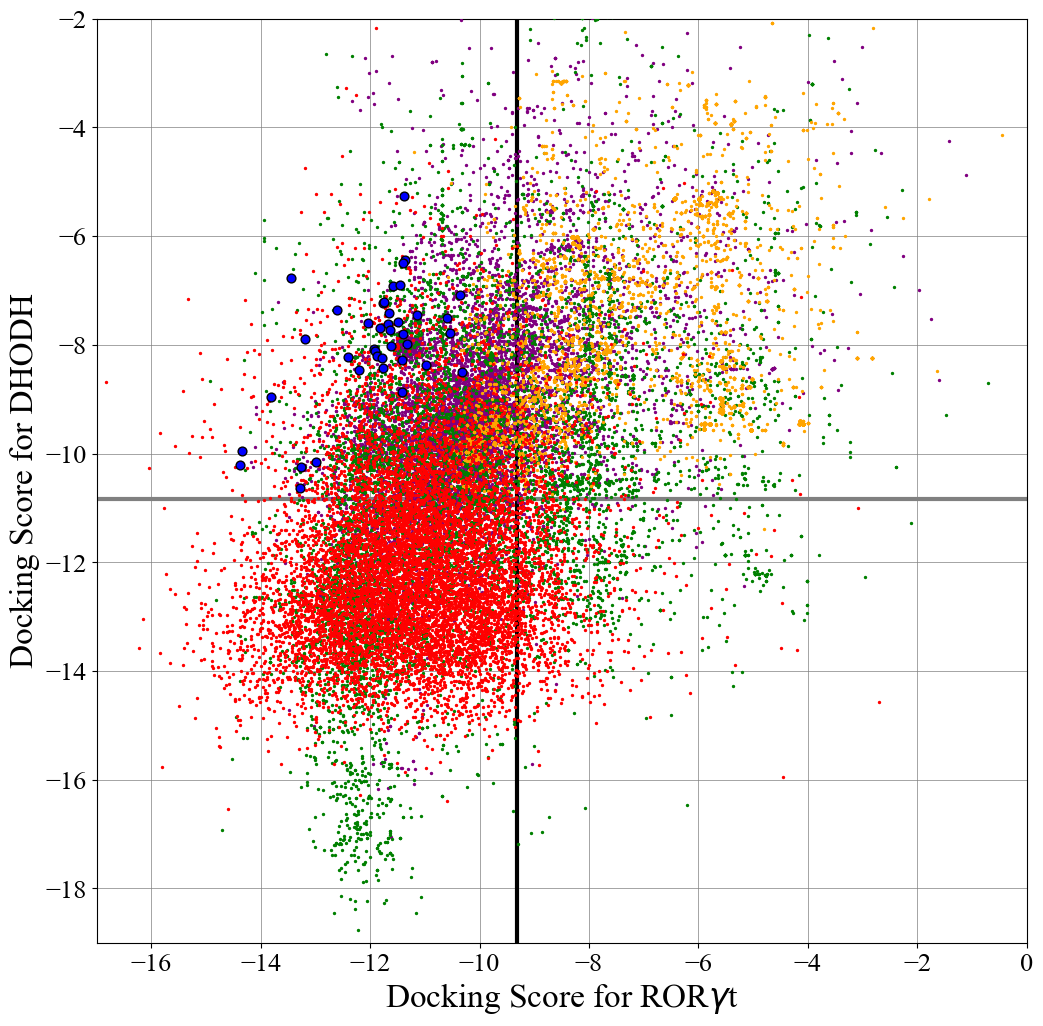

In [42]:
plt.clf()
fig=plt.figure(figsize=(12,12))
plt.grid(True,color="gray",linewidth="0.5",axis="both")
ref_rorx=np.mean(df_dict[target1][0][f'{pdb_id1}_{prec}'])
ref_dhoy=np.mean(df_dict[target2][0][f'{pdb_id2}_{prec}'])
plt.plot([plt.xlim()[0]-100,plt.xlim()[1]+100],[ref_dhoy,ref_dhoy],label='BAY2402234',color='grey',linewidth=3)
plt.plot([ref_rorx,ref_rorx],[plt.ylim()[0]-100,plt.ylim()[1]+100],label='GSK_98E',color='black',linewidth=3)
for name in ['ReINVENT','RationaleRL','MARS','AIxFuse','JMC']:
    score1s=df_dict[name][0][f'{pdb_id1}_{prec}']
    score2s=df_dict[name][0][f'{pdb_id2}_{prec}']
    if name =='JMC':
        plt.scatter(score1s,score2s,edgecolors='black',s=40,color=color_dict[name],label=name,zorder=101)
    else:
        plt.scatter(score1s,score2s,s=2,color=color_dict[name],label=name,zorder=100)
plt.ylim((-19,-2))
plt.xlim((-17,0))
plt.xlabel('Docking Score for ROR'+r'$\gamma$'+'t',fontdict={'family' : 'Times New Roman', 'size'   : 24})
plt.ylabel('Docking Score for DHODH',fontdict={'family' : 'Times New Roman', 'size'   : 24})
plt.xticks(fontproperties = 'Times New Roman', size = 19)
plt.yticks(fontproperties = 'Times New Roman', size = 19)
fig.savefig('data/outputs/draw/docking/scatters.png',transparent=True)

In [38]:
metric_dict={
    f'{pdb_id1}_{prec}':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse','JMC']],
    f'{pdb_id2}_{prec}':[df_dict[name] for name in ['ReINVENT','RationaleRL','MARS','AIxFuse','JMC']]}
for metric in metric_dict:
    fig=plt.figure(figsize=(9,3))
    for model,model_name,color in metric_dict[metric]:
        col=model[metric].dropna()
        # col[col.isnull()]=0
        sns.distplot(col, hist=False, kde=True,
            kde_kws={'fill': True, 'linewidth': 3},
            label=model_name,color=color)
    if metric == '5NTP_XP':
        plt.xlim((-17,0))
    if metric == '6QU7_XP':
        plt.xlim((-19,-2))
    plt.ylim(top=plt.ylim()[1])
    title=metric
    if metric == f'{pdb_id1}_{prec}':
        title=title1+f' Docking Score'
    if metric == f'{pdb_id2}_{prec}':
        title=title2+f' Docking Score'
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    plt.yticks(fontproperties = 'Times New Roman', size = 14)
    plt.tight_layout()
    # plt.xlim(left=0)
    # plt.ylim(bottom=plt.ylim()[0]+plt.ylim()[1]/100)
    fig.savefig(os.path.join('data/outputs/draw/docking',f'distribution_{metric}.png'),dpi=250,transparent=True)
    plt.close()

/tmp/ipykernel_910433/3825613092.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_910433/3825613092.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col, hist=False, kde=True,
/tmp/ipykernel_910433/3825613092.py:9: UserWarning: 



In [6]:
width =0.5
colors=['purple','green','orange','blue','red']

data=[1.75, 11.95, 17.83, 1.60, 23.59]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Success Rate of (%) on GSK3" + r'$\beta$' + '|JNK3 Design Tsk',fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate/rorgt_dhodh/success_rate_gsk3b_jnk3.png'),dpi=250,transparent=True)
plt.clf()

data=[4.65, 1.16, 0.00, 1.89, 23.59]
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.grid(True,color="gray",linewidth="0.5",axis="both",zorder=0)
plt.xticks([0,1,2,3,4],['REINVENT2.0','RationaleRL','MARS','AIxFuse(w/o ALRL)','AIxFuse'])
plt.xlabel("Method",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xticks(fontproperties = 'Times New Roman', size = 14, rotation=15)
ax1.set_ylabel("Success Rate of (%) on ROR" + r'$\gamma$' + '|DHODH Design Tsk',fontdict={'family' : 'Times New Roman', 'size'   : 16})
ax1.bar(np.array(range(len(data))) , data,width=width,edgecolor='black',color=colors,zorder=100,linewidth=2)
plt.tight_layout()
plt.savefig(os.path.join('data/outputs/draw/success_rate/rorgt_dhodh/success_rate_rorgt_dhodh.png'),dpi=250,transparent=True)
plt.clf()

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>